## Livro

Bibliotecas - Pag 15 e 16

Cookiecutter (Pag 21): https://github.com/drivendata/cookiecutter-data-science

## **Bibliotecas (Import)**


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import (
    train_test_split
    )

from sklearn import (
    preprocessing
    )

In [21]:
#!pip uninstall pandas-profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [22]:
import warnings
warnings.filterwarnings('ignore')

## **Coleta de dados**


In [23]:
df = pd.read_csv("titanic.csv").drop(1309)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [24]:
df = df.drop(columns=[
    "name",
    "ticket",
    "home.dest",
    "boat",
    "body",
    "cabin"
])

df = pd.get_dummies(df, drop_first=True) #substituindo colunas categoricas e dropando coluna correlacionada
y = df.survived
X = df.drop(columns='survived')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    ) 

In [25]:
from sklearn.experimental import (
    enable_iterative_imputer
)
from sklearn.impute import IterativeImputer

num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male']

imputer = IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:,num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:,num_cols] = imputed

In [26]:
X_before_sd = pd.concat([X_train, X_test]).reset_index(drop=True)

In [27]:
cols = "pclass,age,sibsp,parch,fare".split(",")
sca = preprocessing.StandardScaler()

normalize_train = sca.fit_transform(X_train[cols])
X_train = pd.DataFrame(normalize_train, columns=cols).join(X_train[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

normalize_test = sca.transform(X_test[cols])
X_test = pd.DataFrame(normalize_test, columns=cols).join(X_test[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

In [28]:
X_test

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.825248,0.496095,-0.498616,-0.432553,-0.502719,1.0,0,1
1,0.825248,-0.673461,0.425943,0.686709,-0.339518,1.0,0,0
2,0.825248,-0.128452,-0.498616,-0.432553,-0.488120,1.0,0,1
3,0.825248,-0.128538,-0.498616,-0.432553,-0.485199,1.0,0,1
4,0.825248,-0.128371,-0.498616,-0.432553,-0.490881,1.0,1,0
...,...,...,...,...,...,...,...,...
388,-0.363317,0.106243,-0.498616,-0.432553,-0.391446,1.0,0,1
389,0.825248,-0.790416,-0.498616,-0.432553,-0.500745,1.0,0,0
390,-0.363317,0.963917,-0.498616,-0.432553,-0.391446,1.0,0,1
391,0.825248,-0.282937,-0.498616,-0.432553,-0.485199,0.0,0,1


In [29]:
X = pd.concat([X_train, X_test]).reset_index(drop=True)
y = pd.concat([y_train, y_test]).reset_index(drop=True)

## **Clustering**

In [40]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=42)
km.fit(X)
X_km = km.predict(X)
X_km

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

Gráfico do cotovelo com uma aparência bem suave

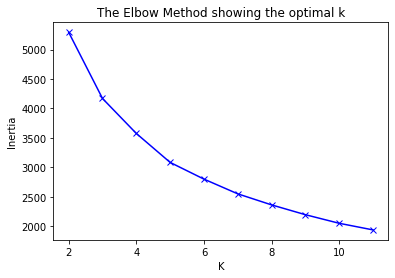

In [45]:
inertias = []
sizes = range(2, 12)
for k in sizes:
  k2 = KMeans(n_clusters=k, random_state=42)
  k2.fit(X)
  inertias.append(k2.inertia_)

fig, ax = plt.subplots(figsize=(6,4))
plt.plot(sizes, inertias, 'bx-')
ax.set_xlabel("K")
ax.set_ylabel("Inertia")
plt.title('The Elbow Method showing the optimal k')
plt.show()

Aqui, plotaremos a inércia, o coeficiente de silhueta, o índice Calinski-Harabasz e o índice Davies-Bouldin em uma variedade de tamanhos de cluster para ver se há um tamanho claro de clusters para os dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d06ecbeb0>,
      dtype=object)

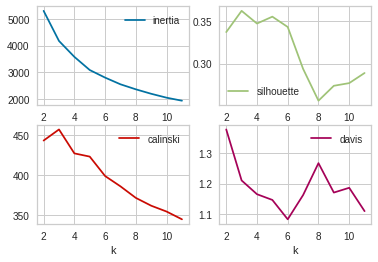

In [54]:
from sklearn import metrics
inertias = []
sils = []
chs = []
dbs = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)
    sils.append(
        metrics.silhouette_score(X, k2.labels_)
    )
    chs.append(
        metrics.calinski_harabasz_score(
            X, k2.labels_
        )
    )
    dbs.append(
        metrics.davies_bouldin_score(
            X, k2.labels_
        )
    )
fig, ax = plt.subplots(figsize=(6, 4))
(
    pd.DataFrame(
        {
            "inertia": inertias,
            "silhouette": sils,
            "calinski": chs,
            "davis": dbs,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)

Visualizar as pontuações de silhueta para cada cluster

A linha vermelha pontilhada vertical neste gráfico é a pontuação média. Uma maneira de interpretá-lo é garantir que cada cluster fique acima da média e que as pontuações do cluster pareçam decentes. 

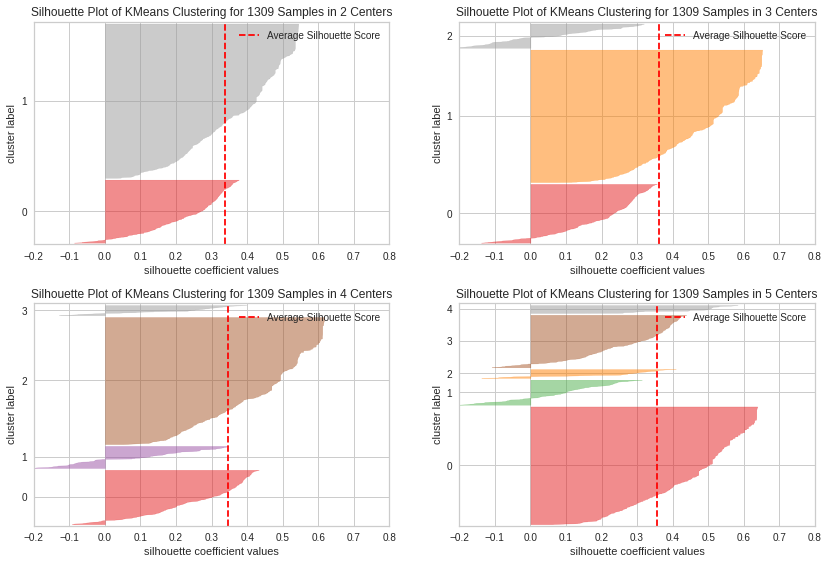

In [55]:
from yellowbrick.cluster.silhouette import (
    SilhouetteVisualizer,
)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.reshape(4)
for i, k in enumerate(range(2, 6)):
    ax = axes[i]
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42),
        ax=ax,
    )
    sil.fit(X)
    sil.finalize()
    ax.set_xlim(-0.2, 0.8)
plt.tight_layout()

## **Clustering (hierárquico) aglomerativo**

3 clusters

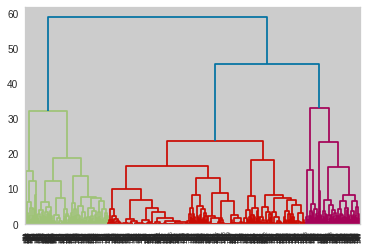

In [57]:
from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(6, 4))
dend = hierarchy.dendrogram(
    hierarchy.linkage(X, method="ward")
)

trucate_mode combina as folhas em um único nó

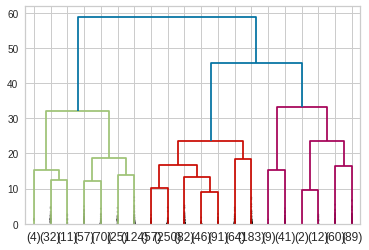

In [58]:
from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(6, 4))
dend = hierarchy.dendrogram(
    hierarchy.linkage(X, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True,
)

In [60]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(
    n_clusters=3,
    affinity="euclidean",
    linkage="ward",
)

ag.fit(X)

AgglomerativeClustering(n_clusters=3)

## **Entendendo os clusters**

Média e variancia de cada atributo.

O valor médio de pclass varia bastante

In [61]:
km = KMeans(n_clusters=2)
km.fit(X)
labels = km.predict(X)
(
    X.assign(cluster=labels, survived=y)
    .groupby("cluster")
    .agg(["mean", "var"])
    .T
)

cluster                 0         1
pclass     mean -1.367341  0.541221
           var   0.200681  0.257190
age        mean  0.940325 -0.311378
           var   1.128451  0.603015
sibsp      mean -0.109328 -0.007973
           var   0.303652  1.180313
parch      mean -0.020194  0.005995
           var   0.655862  1.054817
fare       mean  0.833152 -0.351493
           var   2.180526  0.055677
sex_male   mean  0.571053  0.673843
           var   0.245598  0.220015
embarked_Q mean  0.018421  0.124865
           var   0.018129  0.109392
embarked_S mean  0.602632  0.737352
           var   0.240099  0.193873
survived   mean  0.573684  0.303552
           var   0.245216  0.211636

Gráfico de barras das médias de cada cluster

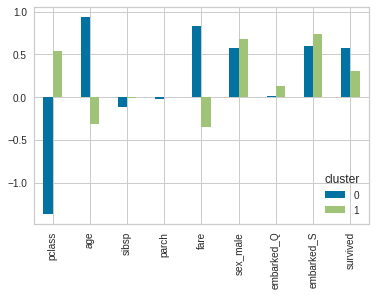

In [63]:
fig, ax = plt.subplots(figsize=(6, 4))
(
    X.assign(cluster=labels, survived=y)
    .groupby("cluster")
    .mean()
    .T.plot.bar(ax=ax)
)

Gráfico de PCA dos clusters

In [65]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
X_pca = pca.fit_transform(X)

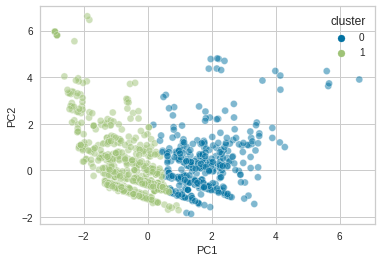

In [66]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(
    "PC1",
    "PC2",
    data=X.assign(
        PC1=X_pca[:, 0],
        PC2=X_pca[:, 1],
        cluster=labels,
    ),
    hue="cluster",
    alpha=0.5,
    ax=ax,
)

Se quisermos analisar um único atributo

In [69]:
(
    X.assign(cluster=y)
    .groupby("cluster")
    .age.describe()
    .T
)

cluster,0.0,1.0
count,809.000000,500.000000
mean,0.074888,0.014938
std,0.998216,1.099813
min,-2.206881,-2.219870
25%,-0.517520,-0.595490
50%,-0.128259,-0.127668
75%,0.574065,0.603615
max,3.536939,4.004761


Podemos criar um modelo substituto para explicar os clusters.

In [73]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X, labels)
for col, val in sorted(
    zip(X.columns, dt.feature_importances_),
    key=lambda col_val: col_val[1],
    reverse=True,
):
    print(f"{col:10}{val:10.3f}")

pclass         0.881
age            0.106
fare           0.011
sibsp          0.002
parch          0.000
sex_male       0.000
embarked_Q     0.000
embarked_S     0.000
